In [127]:
import pandas as pd
import numpy as np

import seaborn as sns 
from matplotlib import pyplot as plt
 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

from sklearn import datasets

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn import tree

In [31]:
df_ = datasets.fetch_california_housing()
df = pd.DataFrame(df_['data'], columns=df_['feature_names'])
df['MedHouseVal'] = df_['target']
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


пропуски в данных отсутствуют

нормализуем признак MedInc по методу минмакс:

<AxesSubplot:title={'center':'Распределение нормализованного MedInc'}, xlabel='NormMedInc', ylabel='Count'>

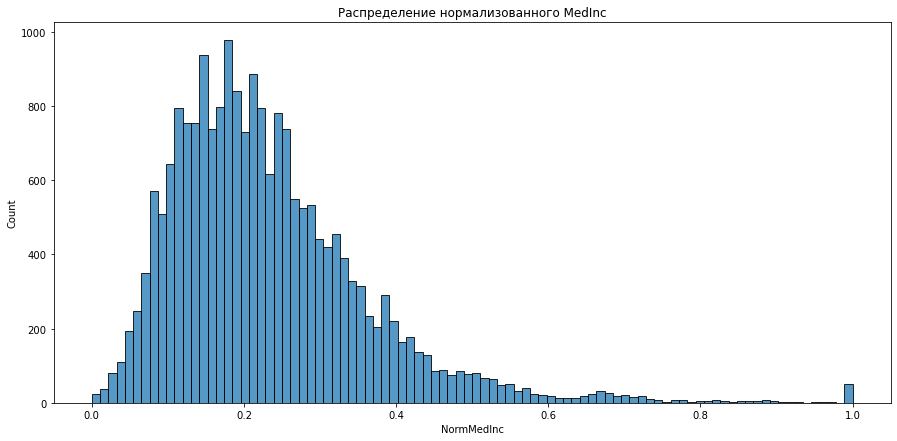

In [8]:
min_medinc = df['MedInc'].min()
max_medinc = df['MedInc'].max()
df['NormMedInc'] = (df['MedInc'] - min_medinc)/(max_medinc - min_medinc)

fig, ax = plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(15)
plt.title('Распределение нормализованного MedInc')
sns.histplot(df['NormMedInc'])

сделаем z-масштабирование признака MedInc:

<AxesSubplot:title={'center':'Распределение z-масштабированого MedInc'}, xlabel='ZMedInc', ylabel='Count'>

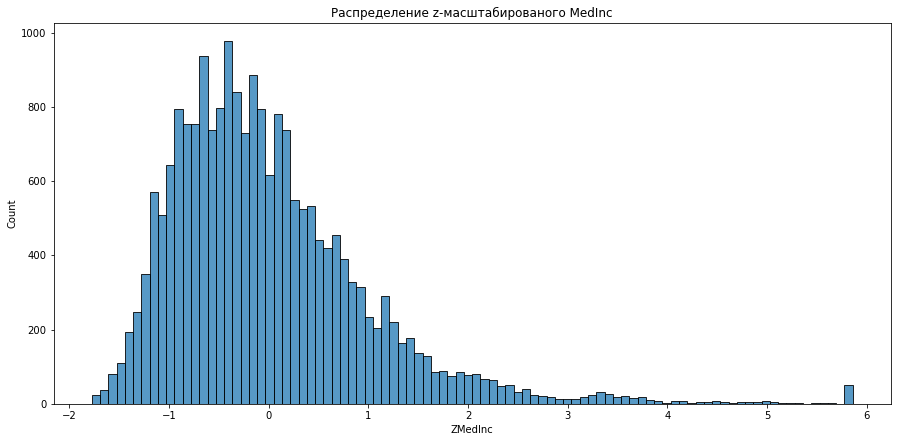

In [9]:
df['ZMedInc'] = (df['MedInc'] - df['MedInc'].mean())/df['MedInc'].std()

fig, ax = plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(15)
plt.title('Распределение z-масштабированого MedInc')
sns.histplot(df['ZMedInc'])

In [32]:
Y = df_['target']
del df['MedHouseVal']
X = df

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [143]:
model = make_pipeline(StandardScaler(), LinearRegression())
model.fit(X_train, Y_train)

model.score(X_test, Y_test)

0.5943232652466202

In [152]:
clf = DecisionTreeRegressor(max_depth=4, random_state=42)
clf.fit(X_train, Y_train)

clf.score(X_test, Y_test)

0.5422062695485081

Text(0.5, 1.0, 'Верхушка дерева решений до глубины max_depth = 4')

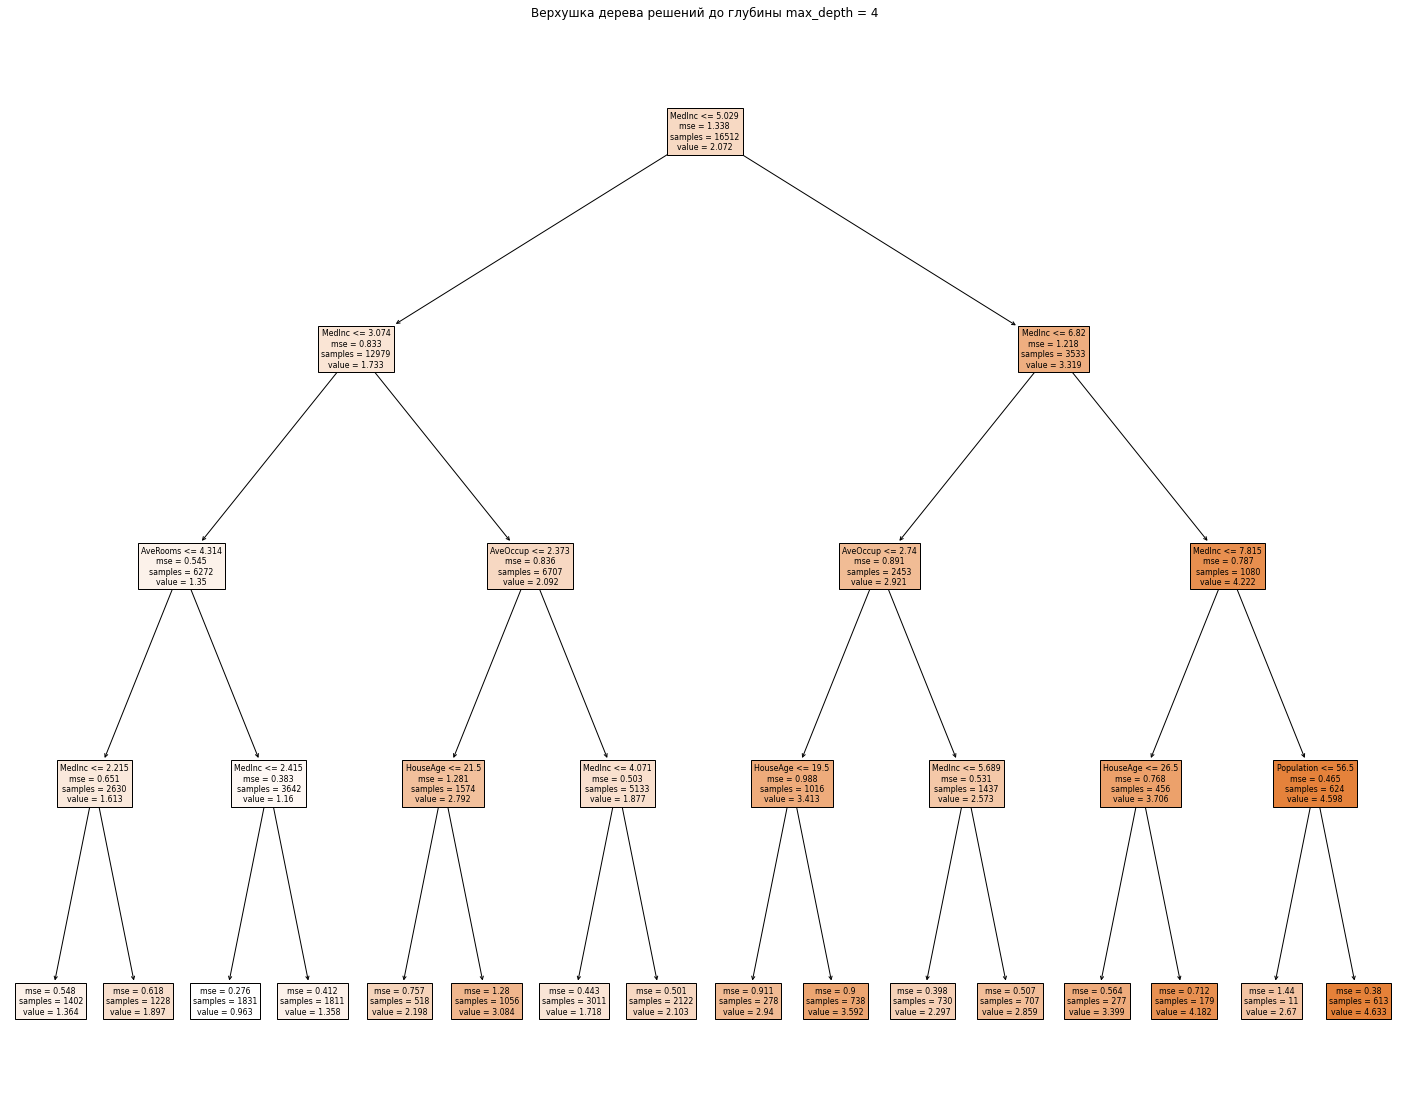

In [150]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, feature_names=df_['feature_names'], filled=True)
plt.title('Верхушка дерева решений до глубины max_depth = 4')

In [134]:
score_max_depth = []
for i in range(20):
    clf = DecisionTreeRegressor(max_depth=i+2, random_state=42)
    clf.fit(X_train, Y_train)
    score_max_depth.append(clf.score(X_test, Y_test))
    print('max_depth = ', i+2, ', score = ', clf.score(X_test, Y_test))

max_depth =  2 , score =  0.41804304179139584
max_depth =  3 , score =  0.4989765792434021
max_depth =  4 , score =  0.5422062695485081
max_depth =  5 , score =  0.5857247671583736
max_depth =  6 , score =  0.6177698126912781
max_depth =  7 , score =  0.6473115329691428
max_depth =  8 , score =  0.6620279083524472
max_depth =  9 , score =  0.6713465748100069
max_depth =  10 , score =  0.6565173825436722
max_depth =  11 , score =  0.6545068500752539
max_depth =  12 , score =  0.6560764000780236
max_depth =  13 , score =  0.6321393683480588
max_depth =  14 , score =  0.627951752139756
max_depth =  15 , score =  0.6230147088686915
max_depth =  16 , score =  0.6043449162991978
max_depth =  17 , score =  0.6020547172050372
max_depth =  18 , score =  0.603111037765943
max_depth =  19 , score =  0.6003450064183438
max_depth =  20 , score =  0.605161608174433
max_depth =  21 , score =  0.5939078961465543


в нашем случае оптимальной будет глубина дерева = 9 с точностью score =  0.67

In [153]:
score_min_samples_split = []
i = 2
while i < 300:
    clf = DecisionTreeRegressor(max_depth=9, min_samples_split = i, random_state=42)
    clf.fit(X_train, Y_train)
    score_min_samples_split.append(clf.score(X_test, Y_test))
    print('min_samples_split = ', i, ', score = ', clf.score(X_test, Y_test))
    i += 20

min_samples_split =  2 , score =  0.6713465748100069
min_samples_split =  22 , score =  0.6739020779418803
min_samples_split =  42 , score =  0.6795650741093087
min_samples_split =  62 , score =  0.677133596709979
min_samples_split =  82 , score =  0.6812725052081569
min_samples_split =  102 , score =  0.6802270157237615
min_samples_split =  122 , score =  0.6790326855496485
min_samples_split =  142 , score =  0.6753072015797089
min_samples_split =  162 , score =  0.675597156751001
min_samples_split =  182 , score =  0.6733734657579955
min_samples_split =  202 , score =  0.6736643925440606
min_samples_split =  222 , score =  0.6703024645612001
min_samples_split =  242 , score =  0.6636809917830899
min_samples_split =  262 , score =  0.6609514568742118
min_samples_split =  282 , score =  0.6517363139929865


в нашем случае оптимальным будет min_samples_split = 82 с точностью score =  0.68

Вывод: на оптимизированном дереве решений получили точноть на 9% выше, чем на линейной регрессии.
Деревья лучше использовать в задачах:
    - с требованиями к максимальной прозрачности критериев разбиения;
    - где целевая переменная точно не может принимать значения за пределами тех, что есть в данных.
Плюсом алгоритма является относительная вычислительная простота, минусом - склонность к переобучению.